In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

In [2]:
star_wars.columns.values

array(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7',
       'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with th

In [3]:
star_wars = star_wars[pd.notnull(star_wars["RespondentID"])]

In [4]:
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [5]:
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts()

Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [6]:
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].isnull().sum()

0

In [7]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts()

Yes    552
No     284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

In [8]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].isnull().sum()

350

## Conversion of Response to Boolean

In [9]:
yes_no = {"Yes": True, "No":False}
col_fields = [
    'Have you seen any of the 6 films in the Star Wars franchise?',
    'Do you consider yourself to be a fan of the Star Wars film franchise?'
] 

for col in col_fields:
    star_wars[col] = star_wars[col].map(yes_no)
    
star_wars[col_fields].head()

,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?
1,True,True
2,False,NaN
3,True,False
4,True,True
5,True,True


In [10]:
mapping_mask = {
    'Star Wars: Episode I  The Phantom Menace': True,
    'Star Wars: Episode II  Attack of the Clones': True,
    'Star Wars: Episode III  Revenge of the Sith' : True,
    'Star Wars: Episode IV  A New Hope' : True,
    'Star Wars: Episode V The Empire Strikes Back': True,
    'Star Wars: Episode VI Return of the Jedi': True,
    np.NaN: False
}

columns = star_wars.columns[3:9]
for column in columns:
    star_wars[column] = star_wars[column].map(mapping_mask)
#star_wars.head()

In [11]:
star_wars = star_wars.rename(columns={
    'Which of the following Star Wars films have you seen? Please select all that apply.' : "seen_1",
    "Unnamed: 4": "seen_2",
    "Unnamed: 5": "seen_3",
    "Unnamed: 6": "seen_4",
    "Unnamed: 7": "seen_5",
    "Unnamed: 8": "seen_6"
    })

star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


## Converting Object to Numeric

In [12]:
star_wars[star_wars.columns[9:15]].head()

,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
1,3,2,1,4,5,6
2,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2,3,4,5,6
4,5,6,1,2,4,3
5,5,4,6,2,1,3


In [13]:
### rename colums
star_wars = star_wars.rename(columns={
        "Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.": "ranking_1",
        "Unnamed: 10": "ranking_2",
        "Unnamed: 11": "ranking_3",
        "Unnamed: 12": "ranking_4",
        "Unnamed: 13": "ranking_5",
        "Unnamed: 14": "ranking_6"
        })

star_wars[star_wars.columns[9:15]].head()

,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6
1,3,2,1,4,5,6
2,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2,3,4,5,6
4,5,6,1,2,4,3
5,5,4,6,2,1,3


In [14]:
star_wars[star_wars.columns[9:15]].dtypes

ranking_1    object
ranking_2    object
ranking_3    object
ranking_4    object
ranking_5    object
ranking_6    object
dtype: object

In [15]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)
star_wars[star_wars.columns[9:15]].dtypes

ranking_1    float64
ranking_2    float64
ranking_3    float64
ranking_4    float64
ranking_5    float64
ranking_6    float64
dtype: object

## Finding Highest Ranked Movie

In [16]:
movie_avg = star_wars[star_wars.columns[9:15]].mean()
movie_avg

ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64

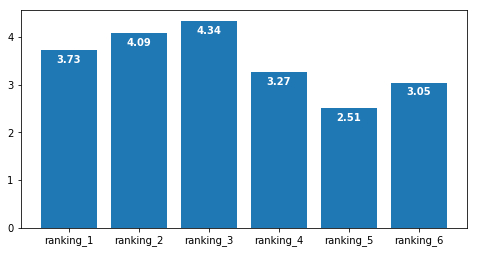

In [17]:
fig, ax = plt.subplots(figsize=(8,4))
ax.bar(range(6), movie_avg, align='center')
ax.set_xticks(range(0,6))
ax.set_xticklabels(movie_avg.index)
for i, v in enumerate(movie_avg.values):
    ax.text(i, v-.2, str(round(v,2)), horizontalalignment='center', 
            verticalalignment='center', 
            color='white', fontweight='bold')
plt.show()

It appears last 3 movies is more favored than the rest of 3 old movies.

## How many people watched the movie

In [18]:
how_many = star_wars[star_wars.columns[3:9]].sum()
how_many

seen_1    673
seen_2    571
seen_3    550
seen_4    607
seen_5    758
seen_6    738
dtype: int64

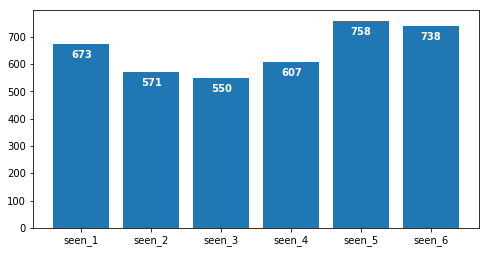

In [19]:
fig, ax = plt.subplots(figsize=(8,4))
ax.bar(range(6), how_many, align='center')
ax.set_xticks(range(0,6))
ax.set_xticklabels(how_many.index)
for i, v in enumerate(how_many.values):
    ax.text(i, v-40, str(v),  horizontalalignment='center', 
            verticalalignment='center',color='white', fontweight='bold')
plt.show()

Last 2 movies were more popular based on the survey

## Analysis By Gender

In [20]:
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]

### High Ranked movie

In [21]:
m_movie_avg = males[star_wars.columns[9:15]].mean()
f_movie_avg = females[star_wars.columns[9:15]].mean()

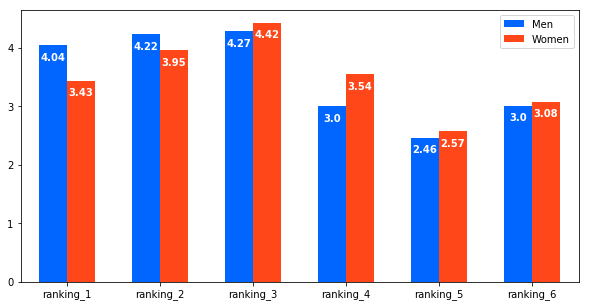

In [22]:
fig, ax = plt.subplots(figsize=(10,5))
ax.set_xlim(-.5,5.5)

##Men
ax.bar(np.arange(6)-.15, m_movie_avg, width=0.3, color = '#0066ff', align='center', label='Men')
ax.set_xticks(range(0,6))
ax.set_xticklabels(m_movie_avg.index)
for i, v in enumerate(m_movie_avg.values):
    ax.text(i-.15, v-.2, str(round(v,2)), horizontalalignment='center', 
            verticalalignment='center', 
            color='white', fontweight='bold')
##Women    
ax.bar(np.arange(6)+0.15, f_movie_avg, width=0.3, color = '#ff471a', align='center', label='Women')
ax.set_xticks(range(0,6))
ax.set_xticklabels(f_movie_avg.index)
for i, v in enumerate(f_movie_avg.values):
    ax.text(i+.15, v-.2, str(round(v,2)), horizontalalignment='center', 
            verticalalignment='center', 
            color='white', fontweight='bold')   
ax.legend(loc='best')
plt.show()

### views

In [23]:
m_how_many = males[star_wars.columns[3:9]].sum()
f_how_many = females[star_wars.columns[3:9]].sum()

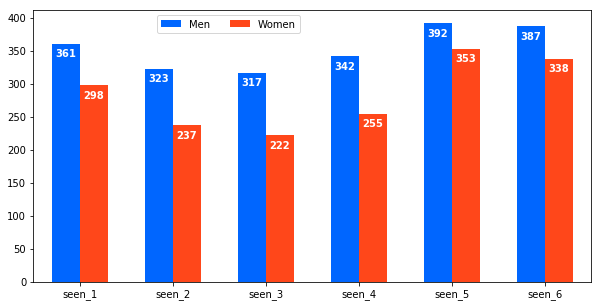

In [24]:
fig, ax = plt.subplots(figsize=(10,5))
ax.set_xlim(-.5,5.5)

##Men
ax.bar(np.arange(6)-.15, m_how_many, width=0.3, color = '#0066ff', align='center', label='Men')
ax.set_xticks(range(0,6))
ax.set_xticklabels(m_how_many.index)
for i, v in enumerate(m_how_many.values):
    ax.text(i-.15, v-15, str(round(v,2)), horizontalalignment='center', 
            verticalalignment='center', 
            color='white', fontweight='bold')
##Women    
ax.bar(np.arange(6)+0.15, f_how_many, width=0.3, color = '#ff471a', align='center', label='Women')
ax.set_xticks(range(0,6))
ax.set_xticklabels(f_how_many.index)
for i, v in enumerate(f_how_many.values):
    ax.text(i+.15, v-15, str(round(v,2)), horizontalalignment='center', 
            verticalalignment='center', 
            color='white', fontweight='bold')   
ax.legend(loc='upper center', bbox_to_anchor = (.35, 1), ncol=2)
plt.show()

## Analysis by weather being a fan of the Star Wars film franchise

In [25]:
star_wars[star_wars.columns[2]].value_counts()

True     552
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

In [26]:
fan = star_wars[star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"]==True]
no_fan = star_wars[star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"]==False]

### Ranking

In [27]:
fan_movie_avg = fan[star_wars.columns[9:15]].mean()
no_fan_movie_avg = no_fan[star_wars.columns[9:15]].mean()

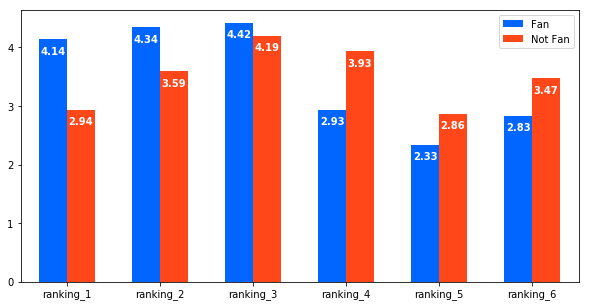

In [28]:
fig, ax = plt.subplots(figsize=(10,5))
ax.set_xlim(-.5,5.5)

##Fan
ax.bar(np.arange(6)-.15, fan_movie_avg, width=0.3, color = '#0066ff', align='center', label='Fan')
ax.set_xticks(range(0,6))
ax.set_xticklabels(fan_movie_avg.index)
for i, v in enumerate(fan_movie_avg.values):
    ax.text(i-.15, v-.2, str(round(v,2)), horizontalalignment='center', 
            verticalalignment='center', 
            color='white', fontweight='bold')
##No Fan    
ax.bar(np.arange(6)+0.15, no_fan_movie_avg, width=0.3, color = '#ff471a', align='center', label='Not Fan')
ax.set_xticks(range(0,6))
ax.set_xticklabels(no_fan_movie_avg.index)
for i, v in enumerate(no_fan_movie_avg.values):
    ax.text(i+.15, v-.2, str(round(v,2)), horizontalalignment='center', 
            verticalalignment='center', 
            color='white', fontweight='bold')   
ax.legend(loc='best')
plt.show()

### Views

In [29]:
fan_how_many = fan[star_wars.columns[3:9]].sum()
no_fan_how_many = no_fan[star_wars.columns[3:9]].sum()

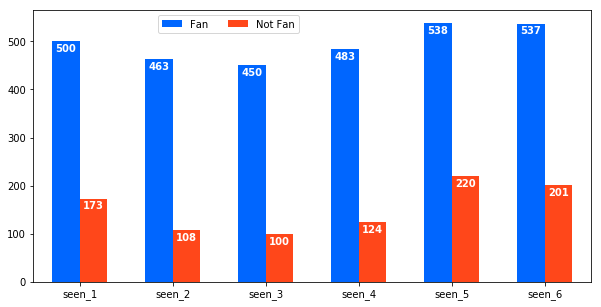

In [30]:
fig, ax = plt.subplots(figsize=(10,5))
ax.set_xlim(-.5,5.5)

##Fan
ax.bar(np.arange(6)-.15, fan_how_many, width=0.3, color = '#0066ff', align='center', label='Fan')
ax.set_xticks(range(0,6))
ax.set_xticklabels(fan_how_many.index)
for i, v in enumerate(fan_how_many.values):
    ax.text(i-.15, v-15, str(round(v,2)), horizontalalignment='center', 
            verticalalignment='center', 
            color='white', fontweight='bold')
##No Fan    
ax.bar(np.arange(6)+0.15, no_fan_how_many, width=0.3, color = '#ff471a', align='center', label='Not Fan')
ax.set_xticks(range(0,6))
ax.set_xticklabels(no_fan_how_many.index)
for i, v in enumerate(no_fan_how_many.values):
    ax.text(i+.15, v-15, str(round(v,2)), horizontalalignment='center', 
            verticalalignment='center', 
            color='white', fontweight='bold')   
ax.legend(loc='upper center', bbox_to_anchor = (.35, 1), ncol=2)
plt.show()

## Analysis by weather being a fan of the Star Trek franchise

In [31]:
star_wars[star_wars.columns[-6]].value_counts()

No     641
Yes    427
Name: Do you consider yourself to be a fan of the Star Trek franchise?, dtype: int64

In [32]:
fan = star_wars[star_wars["Do you consider yourself to be a fan of the Star Trek franchise?"]=="Yes"]
no_fan = star_wars[star_wars["Do you consider yourself to be a fan of the Star Trek franchise?"]=="No"]

### Ranking

In [33]:
fan_movie_avg = fan[star_wars.columns[9:15]].mean()
no_fan_movie_avg = no_fan[star_wars.columns[9:15]].mean()

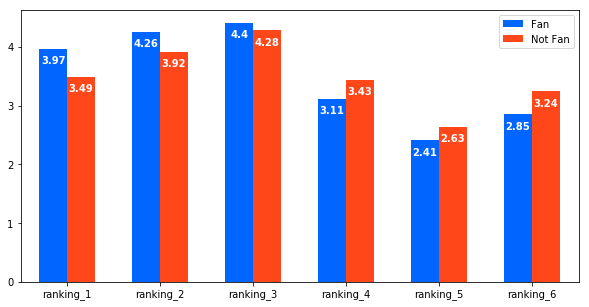

In [34]:
fig, ax = plt.subplots(figsize=(10,5))
ax.set_xlim(-.5,5.5)

##Fan
ax.bar(np.arange(6)-.15, fan_movie_avg, width=0.3, color = '#0066ff', align='center', label='Fan')
ax.set_xticks(range(0,6))
ax.set_xticklabels(fan_movie_avg.index)
for i, v in enumerate(fan_movie_avg.values):
    ax.text(i-.15, v-.2, str(round(v,2)), horizontalalignment='center', 
            verticalalignment='center', 
            color='white', fontweight='bold')
##No Fan    
ax.bar(np.arange(6)+0.15, no_fan_movie_avg, width=0.3, color = '#ff471a', align='center', label='Not Fan')
ax.set_xticks(range(0,6))
ax.set_xticklabels(no_fan_movie_avg.index)
for i, v in enumerate(no_fan_movie_avg.values):
    ax.text(i+.15, v-.2, str(round(v,2)), horizontalalignment='center', 
            verticalalignment='center', 
            color='white', fontweight='bold')   
ax.legend(loc='best')
plt.show()

### Views

In [35]:
fan_how_many = fan[star_wars.columns[3:9]].sum()
no_fan_how_many = no_fan[star_wars.columns[3:9]].sum()

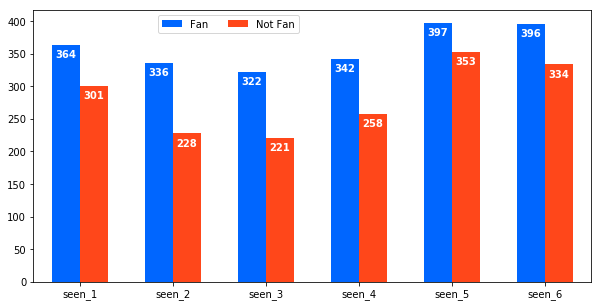

In [36]:
fig, ax = plt.subplots(figsize=(10,5))
ax.set_xlim(-.5,5.5)

##Fan
ax.bar(np.arange(6)-.15, fan_how_many, width=0.3, color = '#0066ff', align='center', label='Fan')
ax.set_xticks(range(0,6))
ax.set_xticklabels(fan_how_many.index)
for i, v in enumerate(fan_how_many.values):
    ax.text(i-.15, v-15, str(round(v,2)), horizontalalignment='center', 
            verticalalignment='center', 
            color='white', fontweight='bold')
##No Fan    
ax.bar(np.arange(6)+0.15, no_fan_how_many, width=0.3, color = '#ff471a', align='center', label='Not Fan')
ax.set_xticks(range(0,6))
ax.set_xticklabels(no_fan_how_many.index)
for i, v in enumerate(no_fan_how_many.values):
    ax.text(i+.15, v-15, str(round(v,2)), horizontalalignment='center', 
            verticalalignment='center', 
            color='white', fontweight='bold')   
ax.legend(loc='upper center', bbox_to_anchor = (.35, 1), ncol=2)
plt.show()